# Data Wrangling - WeRateDogs

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

## Gather

In [80]:
#load the tweet archive
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#download image predictions from url, open as dataframe and save as csv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_image = pd.read_csv(url, sep = '\t')
df_image.to_csv('image-predictions.csv', index=False)

In [14]:
#access tweets in df_twitter to gather details in new dataframe
#login details
consumer_token = '' 
consumer_secret = '' 
access_token = '' 
access_token_secret = ''
auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [15]:

#create txt file called tweet_json.txt
file = open('tweet_json.txt','w+')
#list for tweets without response
error_list = []
#loop through tweets and save json to txt file
for tweet_id in df_twitter.tweet_id:
    try:
        tweets = api.get_status(tweet_id)
        tweet_str = json.dumps(tweets._json)
    
        file.write(tweet_str + '\n')
    except:
        error_list.append(tweet_id)
file.close()


Rate limit reached. Sleeping for: 197
Rate limit reached. Sleeping for: 619
Rate limit reached. Sleeping for: 607


In [16]:
#read txt file line by line and create dataframe
tweet_id = []
followers = []
retweet_count = []
favourite_count = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet_json = json.loads(line)
        tweet_id.append(tweet_json['id'])
        retweet_count.append(tweet_json['retweet_count'])
        favourite_count.append(tweet_json['favorite_count'])

df_json = pd.DataFrame({'tweet_id' : tweet_id,  
                        'retweet_count':retweet_count, 
                        'favourite_count':favourite_count
  }, columns=['tweet_id', 'retweet_count', 'favourite_count'])

## Assess

In [19]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_json.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8372,38214
1,892177421306343426,6181,32762
2,891815181378084864,4091,24674
3,891689557279858688,8508,41547
4,891327558926688256,9216,39729


In [24]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id           2342 non-null int64
retweet_count      2342 non-null int64
favourite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [25]:
#make sure there are only two values for the classification columns
print(df_twitter.doggo.value_counts())
print(df_twitter.floofer.value_counts())
print(df_twitter.pupper.value_counts())
print(df_twitter.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [26]:
#find if any of the probabilities add to 1
sum((df_image.p1_conf + df_image.p2_conf + df_image.p3_conf) == 1)

0

In [27]:
#search for duplicated rows
print(sum(df_twitter.duplicated()))
print(sum(df_image.duplicated()))
print(sum(df_json.duplicated()))

0
0
0


In [28]:
#search for duplicated id's
print(sum(df_twitter['tweet_id'].duplicated()))
print(sum(df_image['tweet_id'].duplicated()))
print(sum(df_json['tweet_id'].duplicated()))

0
0
0


In [29]:
# inspect any rows with a denominator not equal to ten
df_twitter.loc[df_twitter['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [30]:
#inspect rows without expanded urls
df_twitter.loc[df_twitter.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


### To Do

*Tidy*

- multiple urls in expanded url (for multiple-photo posts)
- doggo, floofer, pupper, puppo columns should be either binary or all put into one column.

*Quality*

- doggo, floofer, pupper, puppo columns have string 'None' instead of NaN
- (df_image.p1_conf + df_image.p2_conf + df_image.p3_conf) never equals 1. Should add a column to identify probability of 'other'.
- - name column has 'None' instead of NaN. Also contains 'a', 'the', 'an', 'quite' in many nameless rows
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be float.
- Some rows are capitalised and others are not - in the p1, p2, and p3 columns. Also, words are separated by '_'
- Should be a way to easily identify whether it is a reply, retweet or original.
- timestamp column should be 'datetime' instead of object.
- remove retweets
- delete rows with no expanded url (as they do not have photos)

## Clean

In [31]:
#create copies of original dataframes
df_image_original = df_image
df_json_original = df_json
df_twitter_original = df_twitter

### multiple urls in expanded url (for multiple-photo posts)

*Define*

df_twitter['expanded_url'] sometimes has multiple urls separated by commas. We only want the twitter url. Loop through the series extracting only the twitter url if it exists. 

In [81]:
#code
#find if a row contains a comma, if it does, find if it has a link to dog_rates twitter.
substring = 'https://twitter.com/dog_rates/status/'
for i in range(len(df_twitter['expanded_urls'])):
    try:
        if ',' in df_twitter['expanded_urls'][i]: 
            if substring in df_twitter['expanded_urls'][i]:
                #find start and end of wanted url, slice it out
                start = df_twitter['expanded_urls'][i].find(substring)
                end = start + 63
                df_twitter['expanded_urls'][i] = df_twitter['expanded_urls'][i][start:end]
    except:
        #pass over any NaN for now.
        pass

/Users/Joshua/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
#test
# 98 known to have a gofundme link originally
df_twitter['expanded_urls'][98]

'https://twitter.com/dog_rates/status/873213775632977920/photo/1'

In [83]:
#test
#113 known to be NaN
df_twitter['expanded_urls'][113]

nan

### doggo, floofer, pupper, puppo columns put into one column or replace with binary values.

*define*

Upon deeper investigation into the data it is clear that there are some rows which contain more than just one typ of dog category. For this reason, and the fact that we will later use these categories for analysis, I'm putting the columns in binary form.

In [84]:

#code
is_doggo = {'None':0, 'doggo':1}
df_twitter['doggo'] = [is_doggo[i] for i in df_twitter['doggo']]


is_floofer = {'None':0, 'floofer':1}
df_twitter['floofer'] = [is_floofer[i] for i in df_twitter['floofer']]


is_pupper = {'None':0, 'pupper':1}
df_twitter['pupper'] = [is_pupper[i] for i in df_twitter['pupper']]


is_puppo = {'None':0, 'puppo':1}
df_twitter['puppo'] = [is_puppo[i] for i in df_twitter['puppo']]


In [85]:
#test
df_twitter['doggo'].value_counts(), df_twitter['floofer'].value_counts(), df_twitter['pupper'].value_counts(), df_twitter['puppo'].value_counts() 

(0    2259
 1      97
 Name: doggo, dtype: int64, 0    2346
 1      10
 Name: floofer, dtype: int64, 0    2099
 1     257
 Name: pupper, dtype: int64, 0    2326
 1      30
 Name: puppo, dtype: int64)

### (df_image.p1_conf + df_image.p2_conf + df_image.p3_conf) never equals 1. Should add a column to identify probability of 'other'.

*define*

Create a new column holding value *1-(df_image.p1_conf + df_image.p2_conf + df_image.p3_conf)* and call is p_other_conf.

In [86]:
#code
df_image['p_other_conf'] = 1 - (df_image.p1_conf + df_image.p2_conf + df_image.p3_conf)

In [87]:
#test
sum((df_image.p_other_conf + df_image.p1_conf + df_image.p2_conf + df_image.p3_conf) == 1)

1843

The probabilities don't add exactly to 1 due to rounding during the math, however, for our purposes it is close enough that it won't make a difference.

- name column has 'None' instead of NaN. Also contains 'a', 'the', 'an', 'quite' in many nameless rows

*define*

Replace 'None', 'a', 'the', 'an', 'quite' value with NaN


In [88]:
#code
df_twitter['name'] = df_twitter['name'].replace(['None', 'a', 'an', 'the', 'quite'], np.nan)

In [89]:
#test
sum(df_twitter['name'].isna())

819

### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be float.

*define*

use .astype(int) to convert these columns.

In attempting this i have painstakingly discovered that int columns can't handle NaN. For my purposes it's fine for me to just leave it.

### Some rows/words are capitalised and others are not - in the p1, p2, and p3 columns. Also, words are separated by '_'

*define*

for df_image.p1, df_image.p2 and df_image.p3 use .replace('\_', ' ') to remove '_' and use .lower to make everything lowercase.

In [90]:
#code
df_image.p1 = df_image.p1.str.lower().str.replace('_', ' ')
df_image.p2 = df_image.p2.str.lower().str.replace('_', ' ')
df_image.p3 = df_image.p3.str.lower().str.replace('_', ' ')

In [91]:
#test
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_other_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True,0.316832
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,0.346972
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.148758
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True,0.008418
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,0.041378


### Should be a way to easily identify whether it is a reply, retweet or original.

*define*

create new column saying whether it is a retweet, reply, or original. Programatically identify using the columns; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id.

In [92]:
#code



#get id for reply and retweets in lists
reply_tweet_ids = df_twitter.loc[df_twitter.in_reply_to_status_id.notnull()].tweet_id.tolist()
retweet_ids = df_twitter.loc[df_twitter.retweeted_status_id.notnull()].tweet_id.tolist()


#create new column and fill rows with generic type
df_twitter['tweet_type'] = 'original'

#change the value of rows with tweet_id in either of the above lists
for i in range(len(df_twitter.tweet_id)):
    if df_twitter.tweet_id[i] in reply_tweet_ids:
        df_twitter.tweet_type[i] = 'reply'
    elif df_twitter.tweet_id[i] in retweet_ids:
        df_twitter.tweet_type[i] = 'retweet'


/Users/Joshua/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Joshua/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
#test
print(len(retweet_ids))
print(len(reply_tweet_ids))
print(df_twitter.tweet_type.value_counts())

181
78
original    2097
retweet      181
reply         78
Name: tweet_type, dtype: int64


### timestamp column should be 'datetime' instead of object.

*define*

Date is in ISO8601 format. Use to_datetime()

In [94]:
df_twitter['timestamp'] =  pd.to_datetime(df_twitter['timestamp'])

In [95]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1537 non-null object
doggo                         2356 non-null int64
floofer                       2356 non-null int64
pupper                        2356 non-null int64
puppo                         2356 non-null int64
tweet_type                  

### remove retweets

*define*

.drop() any rows labelled as retweets in tweet_type

In [96]:
#code

#save retweets in different df
df_retweets = df_twitter[df_twitter.tweet_type == 'retweet']
#save df_twitter as all non-retweets
df_twitter = df_twitter[df_twitter.tweet_type != 'retweet']

In [97]:
#test
df_twitter.tweet_type.value_counts()

original    2097
reply         78
Name: tweet_type, dtype: int64

### delete rows with no expanded url (as they do not have photos)

*define*

use .loc to locate rows with expanded urls and save that df over df_twitter

In [98]:
#code
df_twitter = df_twitter.loc[df_twitter.expanded_urls.notnull()]

In [99]:
#test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1423 non-null object
doggo                         2117 non-null int64
floofer                       2117 non-null int64
pupper                        2117 non-null int64
puppo                         2117 non-null int64
tweet_type                    2117

## Reassess

- Drop columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Merge df_twitter, df_image, and df_json on tweet_id.

## Clean

### Drop columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

In [100]:
#code
df_twitter.drop(labels = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
               axis = 1, inplace = True)

In [101]:
#test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1423 non-null object
doggo                    2117 non-null int64
floofer                  2117 non-null int64
pupper                   2117 non-null int64
puppo                    2117 non-null int64
tweet_type               2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 264.6+ KB


### Merge df_twitter, df_image, and df_json on tweet_id.

*define*

- Left join df_twitter(left) and df_image(right) as df_master.
- Left join df_master(left) and df_json(right) as df_master.

In [132]:
df_master = pd.merge(df_twitter, df_image, how='left', on=['tweet_id'])

In [133]:
df_master = pd.merge(df_master, df_json, how='left', on=['tweet_id'])

In [134]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 29 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1423 non-null object
doggo                    2117 non-null int64
floofer                  2117 non-null int64
pupper                   2117 non-null int64
puppo                    2117 non-null int64
tweet_type               2117 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog            

## Store

 - Save df_master as twitter_archive_master.csv

In [135]:
df_master.to_csv('twitter_archive_master.csv')

## Analysis

What is the average rating for each dog classification?

In [136]:
#doggo rating out of 10
doggo_numerators = df_master.loc[df_master.doggo == 1].rating_numerator
doggo_denominators = df_master.loc[df_master.doggo == 1].rating_denominator

#not all ratings are out of 10 so divide numerator by denominator and multiply by 10 to get adjusted rating
doggo_ratings = (doggo_numerators/doggo_denominators)*10

In [137]:
#floofer rating out of 10
floofer_numerators = df_master.loc[df_master.floofer == 1].rating_numerator
floofer_denominators = df_master.loc[df_master.floofer == 1].rating_denominator
#not all ratings are out of 10 so divide numerator by denominator and multiply by 10 to get adjusted rating
floofer_ratings = (floofer_numerators/floofer_denominators)*10

In [138]:
#pupper rating out of 10
pupper_numerators = df_master.loc[df_master.pupper == 1].rating_numerator
pupper_denominators = df_master.loc[df_master.pupper == 1].rating_denominator
#not all ratings are out of 10 so divide numerator by denominator and multiply by 10 to get adjusted rating
pupper_ratings = (pupper_numerators/pupper_denominators)*10

In [139]:
#puppo rating out of 10
puppo_numerators = df_master.loc[df_master.puppo == 1].rating_numerator
puppo_denomiators = df_master.loc[df_master.puppo == 1].rating_denominator
#not all ratings are out of 10 so divide numerator by denominator and multiply by 10 to get adjusted rating
puppo_ratings = (puppo_numerators/puppo_denomiators)*10

In [140]:
#bootstrap ratings from each ratings list
#convert each rating list to pandas series
doggo_boot = []
floofer_boot = []
pupper_boot = []
puppo_boot = []

for i in range(10000):
    doggo = np.random.choice(doggo_ratings, size = 100, replace = True)
    floofer = np.random.choice(floofer_ratings, size = 100, replace = True)
    pupper = np.random.choice(pupper_ratings, size = 100, replace = True)
    puppo = np.random.choice(puppo_ratings, size = 100, replace = True)
    doggo_boot.append(doggo.mean())
    floofer_boot.append(floofer.mean())
    pupper_boot.append(pupper.mean())
    puppo_boot.append(puppo.mean())
    
doggo_boot = pd.Series(doggo_boot)
floofer_boot = pd.Series(floofer_boot)
pupper_boot = pd.Series(pupper_boot)
puppo_boot = pd.Series(puppo_boot)

In [141]:
#combine bootstrapped series into dataframe
df_boot_ratings = pd.DataFrame(
    {'doggo': doggo_boot,
     'floofer': floofer_boot,
     'pupper': pupper_boot,
     'puppo': puppo_boot
    })

In [142]:
#describe bootstrapped data
df_boot_ratings.describe()

,doggo,floofer,pupper,puppo
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.761754,11.801086,10.821393,12.041595
std,0.154306,0.098587,0.203566,0.124050
min,11.090000,11.420000,10.090000,11.520000
25%,11.660000,11.740000,10.680000,11.960000
50%,11.760000,11.800000,10.820000,12.040000
75%,11.870000,11.870000,10.950000,12.130000
max,12.310000,12.140000,11.630000,12.500000


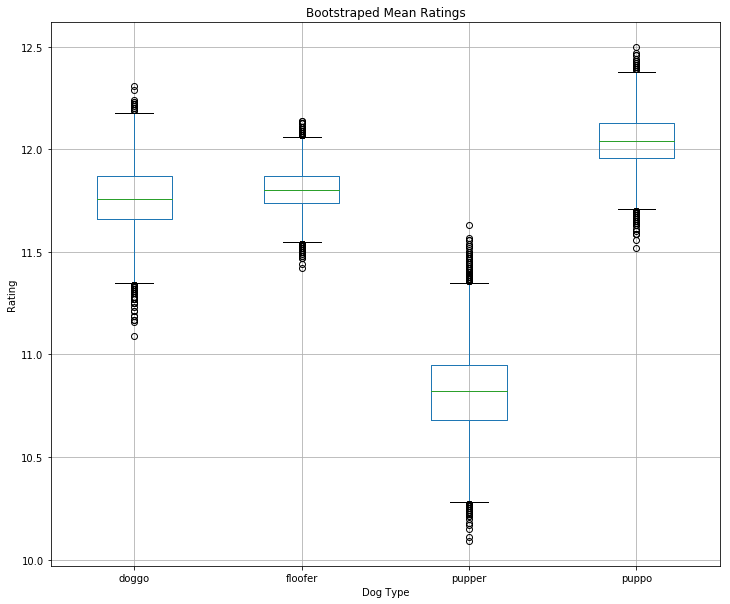

In [187]:
#display as boxplot
df_boot_ratings.boxplot(column=['doggo', 'floofer', 'pupper', 'puppo'], figsize = (12,10))
plt.title('Bootstraped Mean Ratings');
plt.xlabel('Dog Type');
plt.ylabel('Rating');

Next we will determine the catergorical preference of the general public based on retweets and favourite.

In [144]:
#find columns with categories and retweets/favourite is not null
#store in new df
df_public = df_master.loc[(df_master.retweet_count != np.nan) & 
                          ((df_master.doggo + df_master.floofer + df_master.pupper + df_master.puppo) > 0)]

In [145]:
#create new column called activity_count which totals retweets and favourites
df_public['activity_count'] = df_public.retweet_count + df_public.favourite_count

/Users/Joshua/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [146]:
df_public.loc[df_public.doggo > 0, 'activity_count'].describe()

count        84.000000
mean      24654.714286
std       36585.022950
min        3175.000000
25%        9095.500000
50%       13841.500000
75%       23362.750000
max      249047.000000
Name: activity_count, dtype: float64

In [147]:
df_public.loc[df_public.floofer > 0, 'activity_count'].describe()

count       10.000000
mean     15132.300000
std      14407.479663
min       2038.000000
25%       5535.250000
50%      11662.500000
75%      18836.750000
max      49626.000000
Name: activity_count, dtype: float64

In [148]:
df_public.loc[df_public.pupper > 0, 'activity_count'].describe()

count       232.000000
mean       9701.762931
std       14839.470003
min         282.000000
25%        3034.250000
50%        4471.000000
75%       10889.500000
max      158129.000000
Name: activity_count, dtype: float64

In [149]:
df_public.loc[df_public.puppo > 0, 'activity_count'].describe()

count        24.000000
mean      29824.666667
std       38950.389052
min        3812.000000
25%        8409.000000
50%       17869.000000
75%       30686.500000
max      189023.000000
Name: activity_count, dtype: float64

Based on the above, pupper's and puppo's get the most public interest. Both with heavily right-skewed distributions, high means and extremely large max values, it's very clear that the general public prefer puppies to fully grown dogs.

note: I think it's important to note that the sample size was very small so the statistic might not be a great indication of the parameter.

Linear Regression for activity_count

In [150]:
#create activity_count column in master dataframe
df_master['activity_count'] = df_master.retweet_count + df_master.favourite_count
#create intercept column in master dataframe
df_master['intercept'] = 1

In [151]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 31 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1423 non-null object
doggo                    2117 non-null int64
floofer                  2117 non-null int64
pupper                   2117 non-null int64
puppo                    2117 non-null int64
tweet_type               2117 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog            

In [152]:
#slice a new dataframe called df_activity containing only rows with activity_count != NaN

In [175]:
df_activity = df_master.loc[df_master.activity_count.notnull()]

In [176]:
len(df_activity)

2116

In [177]:
#import statsmodel
import statsmodels.api as sm

In [178]:
#run multiple linear regression with dog categories as x and activity_count as y
lm = sm.OLS(df_activity['activity_count'], df_activity[['intercept', 'doggo', 'floofer', 'pupper', 'puppo']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         activity_count   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     20.84
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           7.22e-17
Time:                        12:46:50   Log-Likelihood:                -23606.
No. Observations:                2116   AIC:                         4.722e+04
Df Residuals:                    2111   BIC:                         4.725e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.098e+04    400.898     27.383      0.000    1.02e+04    1.18e+04
doggo       1.365e+04   1887.843      7.229      0.000    9945.722    1.74e+04
floofer     2789.5896   5376.153      0.519      0.604   -7753.521    1.33e+04
pupper     -1864.4262   1180.650     -1.579      0.114   -4179.786     450.933
puppo       1.828e+04   3482.530      5.249      0.000    1.14e+04    2.51e+04
==============================================================================
Omnibus:                     2117.884   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134727.620
Skew:                           4.776   Prob(JB):                         0.00
Kurtosis:                      40.906   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation

3.8% of variation can be explain by the above model. The model is a terrible fit.

Results

All things being equal: We can expect a status from We_Rate_Dogs to get public activity of 16400 (either retweets or favourites. If the dog in the picture is labeled as a doggo, pupper, or puppo it will result in an increase of 8437, 17600, and 30490 (respectively).

According to our model, a dog labelled 'floofer' has no significance on the activity_count.


We_Rate_Dogs activity by hour of the day.

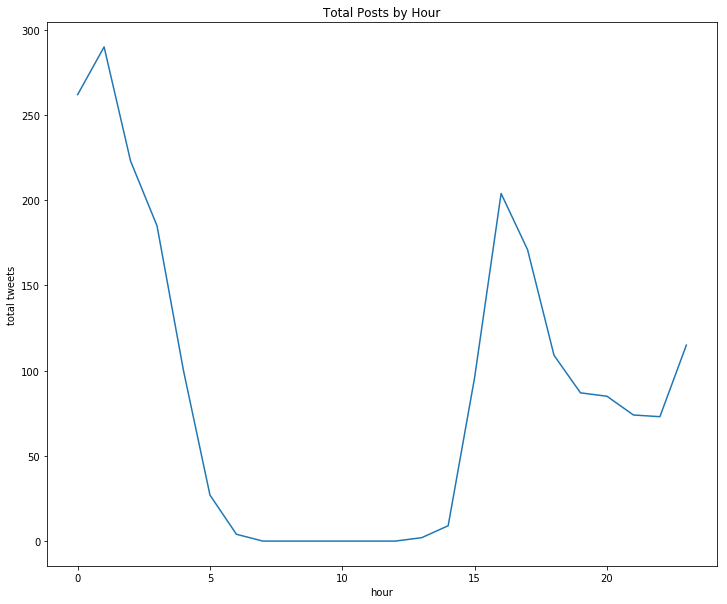

In [188]:
#get a series with the number of posts per hour
posts_by_hour = df_activity.timestamp.dt.hour.value_counts().sort_index()
missing_index = pd.Series([0,0,0,0,0,0], index = [7,8,9,10,11,12])
posts_by_hour = posts_by_hour.append(missing_index).sort_index()
posts_by_hour.plot(kind = 'line', use_index = True, figsize = (12,10), title = 'Total Posts by Hour')
plt.xlabel('hour');
plt.ylabel('total tweets');

In [180]:
#create new column in activity with the hour of day the post was made
df_activity['hour'] = df_activity.timestamp.dt.hour

/Users/Joshua/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [181]:
#get total public activity by hour.
activity_by_hour = df_activity.groupby('hour')['activity_count'].sum()
activity_by_hour = activity_by_hour.append(missing_index).sort_index()

In [182]:
#divide public activity_by_hour by number of posts_by_hour to get the average activity of a post by hour
average_activity_per_hour = activity_by_hour/posts_by_hour

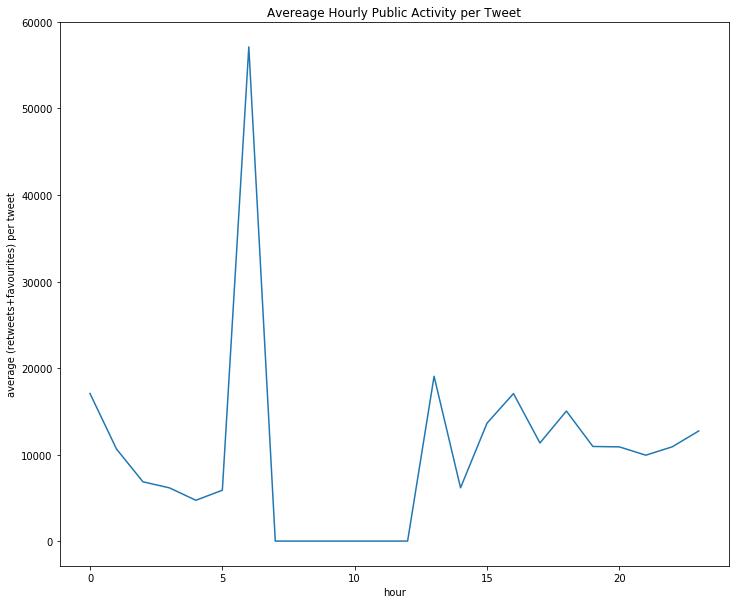

In [183]:
#fill NaN values with 0's and plot line.
average_activity_per_hour.fillna(0, inplace = True)
average_activity_per_hour.plot(kind = 'line', figsize = (12,10), title = 'Avereage Hourly Public Activity per Tweet')
plt.xlabel('hour');
plt.ylabel('average (retweets+favourites) per tweet');

In [185]:
posts_by_hour

0     262
1     290
2     223
3     185
4     100
5      27
6       4
7       0
8       0
9       0
10      0
11      0
12      0
13      2
14      9
15     96
16    204
17    171
18    109
19     87
20     85
21     74
22     73
23    115
dtype: int64